In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

Imported the data

In [3]:
data1 = pd.read_csv('Datasets/food_truck_data.txt')
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Defined the Cost Function, Gradient Descent and Prediction Function

In [3]:
def costFunction(x,y,theta):
    n = len(y)
    yhat = x.dot(theta)
    error = (yhat - y)**2
    jtheta = np.sum(error)/(2*y)
    return jtheta

In [14]:
def gradientDescent(x,y,theta,alpha,iteration):
    n = len(y)
    costs = []
    for i in range(iteration):
        yhat = x.dot(theta)
        error = np.dot(x.transpose(),(yhat-y))
        theta -= (alpha*error)/n
        costs.append(costFunction(x,y,theta))
    return theta,costs

In [24]:
def predict(x, theta):
 y_pred = np.dot(theta.transpose(), x)
 return y_pred

Setting variables and values for the dataset and reshaping it

In [5]:
m = len(data1)
x = np.append(np.ones((m, 1)), data1['Population'].values.reshape(m, 1), axis=1)
y = data1['Profit'].values.reshape(m, 1)

In [6]:
print(x.shape)
print(y.shape)

(97, 2)
(97, 1)


In [7]:
theta = np.zeros((2,1))

In [11]:
jtheta = costFunction(x,y,theta)
print(jtheta)

[[  176.84488325]
 [  340.74337759]
 [  227.71594101]
 [  262.44771268]
 [  455.94583063]
 [  261.74113967]
 [  715.46470715]
 [  259.25459884]
 [  471.46486219]
 [  815.13786777]
 [  956.60020482]
 [  200.64851249]
 [  986.04012111]
 [  430.54820035]
 [ 4343.95708637]
 [  885.60880928]
 [  586.46041059]
 [ 5547.82742678]
 [  851.92375982]
 [  577.26517101]
 [  991.22385335]
 [  142.92530832]
 [  729.78071455]
 [  599.72148166]
 [ 1009.26364513]
 [  137.42623845]
 [  230.43146331]
 [  441.49107896]
 [  211.75164621]
 [  128.83816566]
 [-2550.04523452]
 [  518.80318616]
 [  256.39155976]
 [ 1682.10607522]
 [  475.50747197]
 [  681.90500101]
 [  755.77086437]
 [  916.95802467]
 [  307.50767877]
 [  565.91392042]
 [ 5589.6925564 ]
 [  795.36116224]
 [  577.68321501]
 [ 1274.70916419]
 [  462.14313944]
 [ 2973.38735173]
 [  606.00642541]
 [ 1687.12320288]
 [  388.67298653]
 [ 3056.34658229]
 [  460.86975381]
 [ 1691.15850517]
 [  725.44133989]
 [  622.4475673 ]
 [ 2185.80424795]
 [-2189.18

In [15]:
theta, costs = gradientDescent(x, y, theta, alpha =0.01, iteration=2000)
print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x1


Here We get our Equation for the Regression Line where c = -3.79 and m = 1.18

In [16]:
theta

array([[-3.78806857],
       [ 1.18221277]])

In [19]:
theta = np.squeeze(theta)
theta

array([-3.78806857,  1.18221277])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


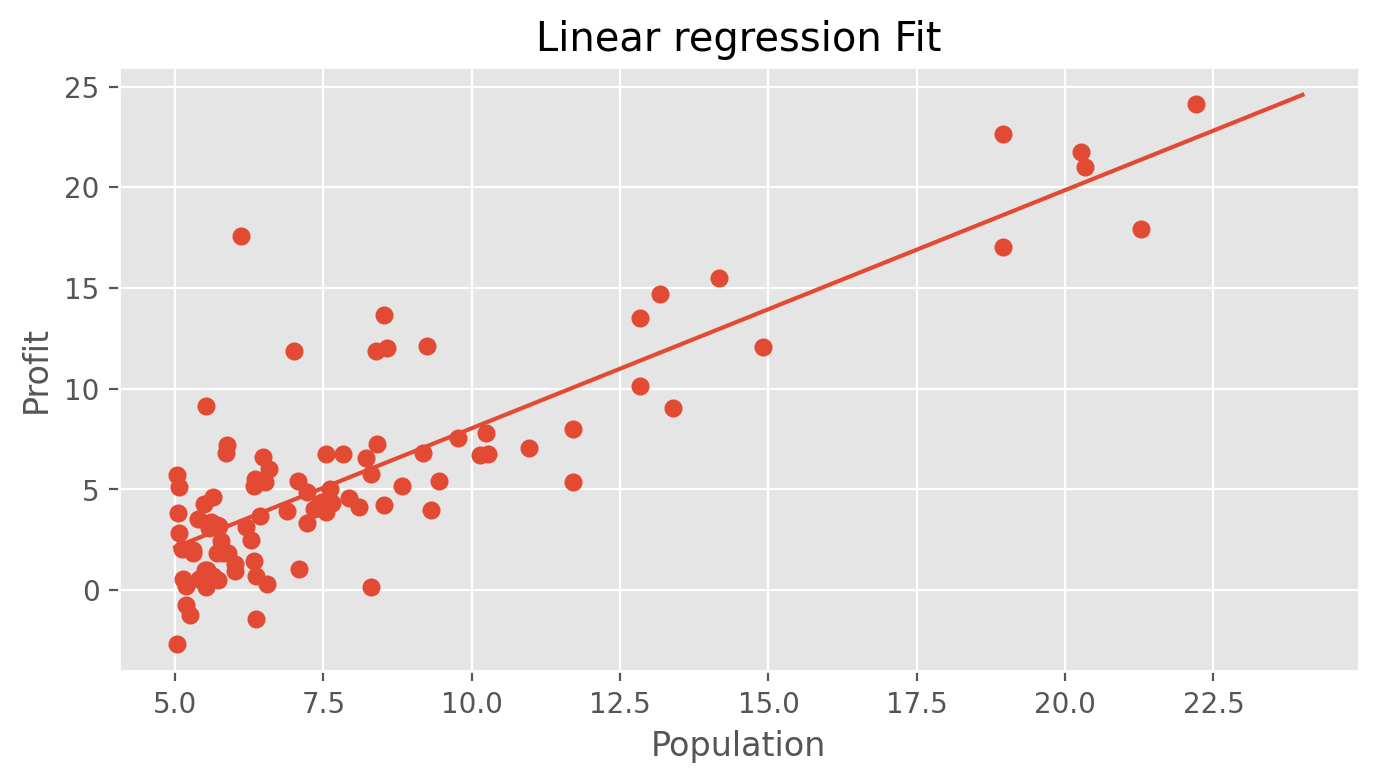

In [23]:
plt.figure(figsize=(8,4), dpi=200)
plt.scatter(data1.Population, data1.Profit)
x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Linear regression Fit");
plt.show()

Here we get our Regression line and it shows that values are positively correlated

In [25]:
y_pred_1 = predict(np.array([1, 8]), theta)*10000
y_pred_1

56696.33625335905

Creating A Synthetic Dataset

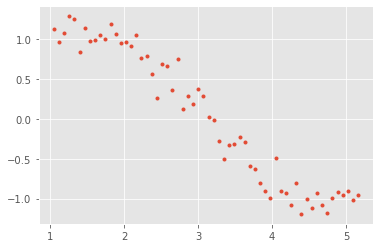

In [34]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(0)  
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data2 = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data2['x'],data2['y'],'.')

In [27]:
m = data2.x.size
x_in = np.append(np.ones((m, 1)), data2.x.values.reshape(m, 1), axis=1)
y_in = data2.y.values.reshape (m, 1)
theta = (np.zeros((2,1)))
costFunction(x_in, y_in, theta)

array([[   18.90844599],
       [   22.29675096],
       [   19.90561108],
       [   16.60866664],
       [   17.0969408 ],
       [   25.50478163],
       [   18.80198488],
       [   21.88880621],
       [   21.72816754],
       [   20.24266794],
       [   21.24226384],
       [   17.98877207],
       [   20.06972728],
       [   22.61235879],
       [   22.14533252],
       [   23.33704294],
       [   20.29960533],
       [   28.23226738],
       [   27.05781937],
       [   37.73496408],
       [   82.27597303],
       [   31.17183398],
       [   32.41208907],
       [   59.69205162],
       [   28.61151302],
       [  172.59490116],
       [   75.67586577],
       [  118.87910174],
       [   57.92223802],
       [   73.6783035 ],
       [  919.81813647],
       [-1640.45125014],
       [  -78.49909029],
       [  -42.33108668],
       [  -65.21336519],
       [  -67.10821995],
       [  -96.215965  ],
       [  -73.94479188],
       [  -36.35689286],
       [  -33.76635984],


In [30]:
theta, costs = gradientDescent(x_in, y_in, theta, alpha =0.01, iteration=2000)
print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = 2.1 + -0.67x1


Here we get the equation of our Regression Line

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Linear regression Fit')

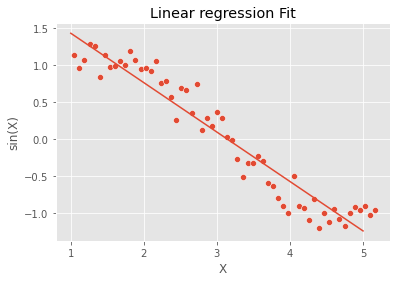

In [32]:
theta = np.squeeze(theta)

sns.scatterplot(x = "x_cr", y = "y_cr", data = data2)

x_value = [x for x in range(1, 6)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]

sns.lineplot(x_value, y_value)

plt.xlabel("X")
plt.ylabel("sin(X)")
plt.title("Linear regression Fit")

Here we get our Regression line and it shows that values are negatively correlated

In [33]:
y_pred_cr = predict(np.array([1, 2]), theta)
y_pred_cr

0.7619921330003427

**Lasso And Ridge Regression**

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 

In [53]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

    x    y  x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10  x_11  x_12  x_13  \
0   1  1.1  1.1  1.1  1.2  1.3  1.3  1.4  1.4  1.5   1.6   1.7   1.7   1.8   
1 1.1 0.96  1.2  1.4  1.6  1.7  1.9  2.2  2.4  2.7     3   3.4   3.8   4.2   
2 1.2  1.1  1.4  1.7    2  2.4  2.8  3.3  3.9  4.7   5.5   6.6   7.8   9.3   
3 1.3  1.3  1.6    2  2.5  3.1  3.9  4.9  6.2  7.8   9.8    12    16    19   
4 1.3  1.3  1.8  2.3  3.1  4.1  5.4  7.2  9.6   13    17    22    30    39   

   x_14  x_15  
0   1.9     2  
1   4.7   5.3  
2    11    13  
3    24    31  
4    52    69  


Text(0.5, 1.0, 'X vs Y')

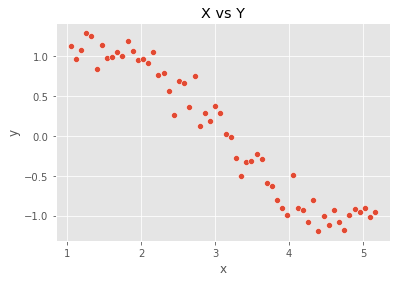

In [54]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(0)
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data1 = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
for i in range(2,16):
    colname = 'x_%d'%i
    data1[colname] = data1['x']**i
print(data1.head())
ax = sns.scatterplot(x = "x", y = "y", data = data1)
ax.set_title("X vs Y")

Apply Linear Regression to the created synthetic Dataset

In [55]:
def linear_regression(data, power, models_to_plot):
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    lr = LinearRegression(normalize=True)
    lr.fit(data[predictors],data['y'])
    y_pred = lr.predict(data[predictors])
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lr.intercept_])
    ret.extend(lr.coef_)
    return ret

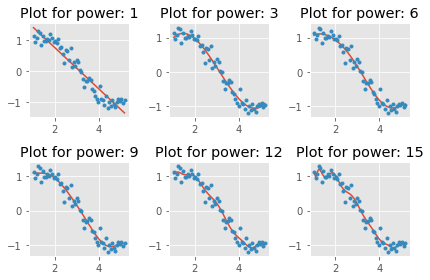

In [56]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data1, power=i, models_to_plot=models_to_plot)

In [41]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.2,2.1,-0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.2,2.2,-0.7,0.0054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.3,-0.62,2.6,-1.2,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.3,0.22,1.3,-0.41,-0.05,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.3,1.8,-2.1,2.2,-0.98,0.17,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,1.3,-1,5.1,-4.9,2.5,-0.75,0.11,-0.0067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,1.2,7.8,-21,26,-17,6.4,-1.4,0.16,-0.0076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,1.2,7.9,-21,27,-18,6.7,-1.5,0.17,-0.0088,4.7e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,1.2,-0.67,11,-27,31,-21,8.6,-2.2,0.34,-0.029,0.001,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,1.2,-2.5e+02,1.1e+03,-2e+03,2.1e+03,-1.4e+03,6.3e+02,-1.9e+02,37,-4.7,0.34,-0.011,NaN,NaN,NaN,NaN,NaN


RIDGE REGRESSION

In [42]:
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    RidgeModel = Ridge(alpha=alpha,normalize=True)
    RidgeModel.fit(data[predictors],data['y'])
    y_pred = RidgeModel.predict(data[predictors])
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([RidgeModel.intercept_])
    ret.extend(RidgeModel.coef_)
    return ret

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.94081e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


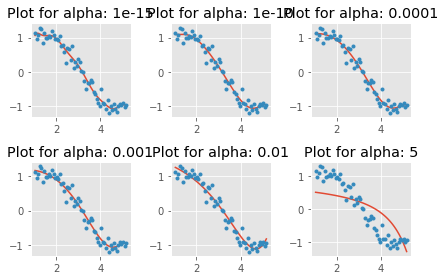

In [43]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data1, predictors, alpha_ridge[i], models_to_plot)

In [44]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge


,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,1.2,-1.7e+02,6.6e+02,-1.1e+03,9.2e+02,-4.4e+02,1e+02,-0.89,-4.4,0.38,0.15,-0.01,-0.0064,0.00028,0.0003,-5.1e-05,2.5e-06
alpha_1e-10,1.2,4.4,-9.5,10,-4.9,0.8,0.094,-0.027,-0.005,0.00048,0.00025,1.9e-05,-6.9e-06,-1.8e-06,4.4e-08,9.6e-08,-9.4e-09
alpha_1e-08,1.3,0.96,-0.18,0.56,-0.29,0.012,0.0076,0.00031,-0.00015,-2.9e-05,-1e-06,4.8e-07,1e-07,1.2e-08,1.7e-09,3.1e-10,-2.1e-10
alpha_0.0001,1.3,0.83,0.45,-0.15,-0.025,-0.002,9e-05,7.2e-05,1.7e-05,3.1e-06,4.6e-07,5.4e-08,3.8e-09,-4.2e-10,-2.7e-10,-8.3e-11,-2.1e-11
alpha_0.001,1.3,1.1,0.15,-0.087,-0.018,-0.0022,-0.00013,2.4e-05,1.1e-05,2.8e-06,5.5e-07,9.2e-08,1.2e-08,9.9e-10,-1.4e-10,-9.7e-11,-3.4e-11
alpha_0.01,1.6,1.5,-0.18,-0.052,-0.0091,-0.0012,-0.0001,2.3e-06,3.7e-06,1.1e-06,2.5e-07,4.6e-08,7.4e-09,9.3e-10,5e-11,-2e-11,-1e-11
alpha_1,6.2,1,-0.15,-0.021,-0.0032,-0.00049,-7.4e-05,-1.1e-05,-1.4e-06,-1.6e-07,-1.1e-08,1.2e-09,7.8e-10,2.5e-10,6.4e-11,1.5e-11,3.4e-12
alpha_5,16,0.58,-0.064,-0.0092,-0.0015,-0.00026,-4.4e-05,-7.4e-06,-1.2e-06,-2.1e-07,-3.4e-08,-5.6e-09,-9e-10,-1.4e-10,-2.2e-11,-3.3e-12,-4.7e-13
alpha_10,21,0.42,-0.04,-0.006,-0.001,-0.00018,-3.2e-05,-5.6e-06,-1e-06,-1.8e-07,-3.1e-08,-5.6e-09,-9.9e-10,-1.8e-10,-3.1e-11,-5.6e-12,-9.9e-13
alpha_20,26,0.28,-0.024,-0.0037,-0.00065,-0.00012,-2.1e-05,-3.9e-06,-7.1e-07,-1.3e-07,-2.4e-08,-4.4e-09,-8.1e-10,-1.5e-10,-2.8e-11,-5.1e-12,-9.5e-13


In [45]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int32

LASSO REGRESSION

In [46]:
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6262548731727712, tolerance: 0.004271668182863766
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6260318897126225, tolerance: 0.004271668182863766
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.604354865382786, tolerance: 0.004271668182863766
  model = cd_fast.enet_coordinate_descent(


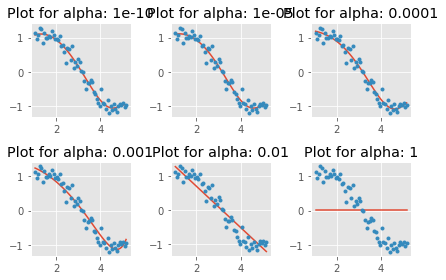

In [48]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data1, predictors, alpha_lasso[i], models_to_plot)

In [49]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,1.3,0.45,0.99,-0.37,-0.0063,0.0019,0.00026,1.6e-05,1.7e-06,8.6e-07,3.1e-07,7.9e-08,1.5e-08,2e-09,4.7e-11,-8.4e-11,-3.9e-11
alpha_1e-10,1.3,0.45,0.99,-0.37,-0.0063,0.0019,0.00026,1.6e-05,1.7e-06,8.6e-07,3.1e-07,7.9e-08,1.5e-08,2e-09,4.8e-11,-8.4e-11,-3.9e-11
alpha_1e-08,1.3,0.45,0.99,-0.37,-0.0062,0.0019,0.00026,1.7e-05,1.7e-06,8.6e-07,3.1e-07,7.9e-08,1.5e-08,2e-09,6.3e-11,-8.3e-11,-3.9e-11
alpha_1e-05,1.3,0.7,0.63,-0.22,-0.021,-0,0,0,3.6e-05,3.6e-06,0,0,0,0,-0,-0,-3e-11
alpha_0.0001,1.3,1.2,0,-0.011,-0.038,-0,0,0,7.3e-06,7.6e-06,0,0,0,0,-0,-0,-2.3e-11
alpha_0.001,1.6,1.4,-0.002,-0.14,-0,-0,0,0,0,0,0,0,2e-08,0,0,0,0
alpha_0.01,3.5,1.9,-0.61,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0,0
alpha_1,43,0.026,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,43,0.026,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,43,0.026,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [50]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      9
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      14
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int32